In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Loading dataset
df = pd.read_csv('/kaggle/input/heartcsv/heart.csv')

# Separate the target variable and features
X = df.drop('target', axis=1)
y = df['target']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [5]:
y_pred = clf.predict(X_test)

In [6]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.8524590163934426
Confusion Matrix:
[[27  2]
 [ 7 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.93      0.78      0.85        32

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



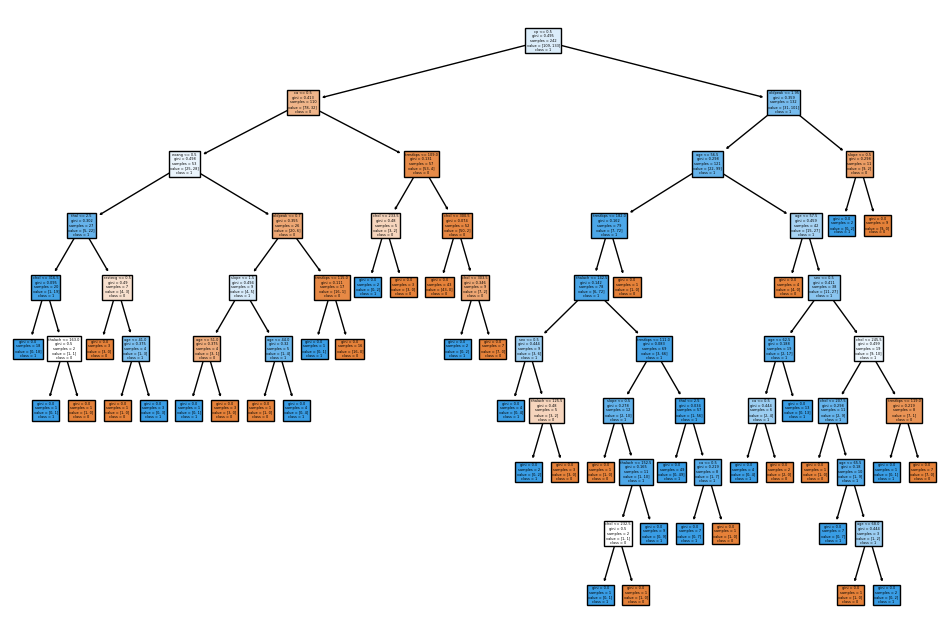

In [7]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=list(map(str, clf.classes_)))
plt.show()

In [8]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=79)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
from sklearn.metrics import confusion_matrix
#Accuray of the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7049180327868853
[[14 15]
 [ 3 29]]


0.3770491803278688
0.36065573770491804
0.3442622950819672
0.32786885245901637
0.3114754098360656
0.2786885245901639
0.29508196721311475
0.3114754098360656
0.3114754098360656
0.29508196721311475
0.2459016393442623
0.26229508196721313
0.26229508196721313
0.26229508196721313
0.3114754098360656
0.2786885245901639
0.3114754098360656
0.3114754098360656
0.29508196721311475
0.3442622950819672
0.29508196721311475
0.2786885245901639
0.2786885245901639
0.2786885245901639
0.29508196721311475
0.2786885245901639
0.2786885245901639
0.29508196721311475
0.2786885245901639
0.26229508196721313
0.29508196721311475
0.29508196721311475
0.29508196721311475
0.29508196721311475
0.3114754098360656
0.2786885245901639
0.3114754098360656
0.3114754098360656
0.3114754098360656


Text(0, 0.5, 'Mean Error')

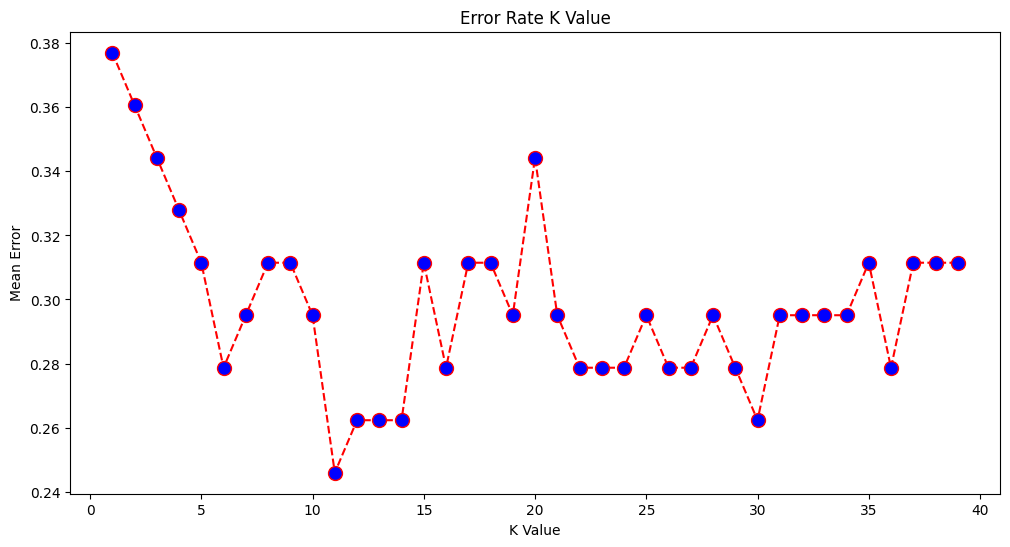

In [9]:
import numpy as np
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    print(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')